In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [2]:
hr_df=pd.read_csv('DS1_C9_S4_Practice_HR_Data.csv')
hr_df

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [3]:
hr_df.shape

(14999, 10)

In [4]:
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_monthly_hours  14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
hr_df['left'].unique()

array([1, 0], dtype=int64)

In [6]:
# task2
# a
bins=[-1,0,1]
labels=["Employee didn't leave the company","Employee left the company"]
hr_df['left_c']=pd.cut(hr_df['left'],bins,labels=labels)


In [7]:
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   satisfaction_level     14999 non-null  float64 
 1   last_evaluation        14999 non-null  float64 
 2   number_project         14999 non-null  int64   
 3   average_monthly_hours  14999 non-null  int64   
 4   time_spend_company     14999 non-null  int64   
 5   Work_accident          14999 non-null  int64   
 6   left                   14999 non-null  int64   
 7   promotion_last_5years  14999 non-null  int64   
 8   Department             14999 non-null  object  
 9   salary                 14999 non-null  object  
 10  left_c                 14999 non-null  category
dtypes: category(1), float64(2), int64(6), object(2)
memory usage: 1.2+ MB


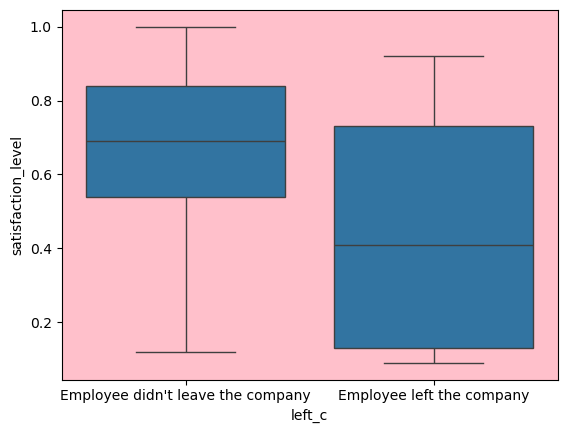

In [8]:
sns.boxplot(x='left_c',y='satisfaction_level',data=hr_df)
plt.gca().set_facecolor('pink')


Text(0.5, 1.0, 'average_monthly_hours:Left vs Stayed Employees')

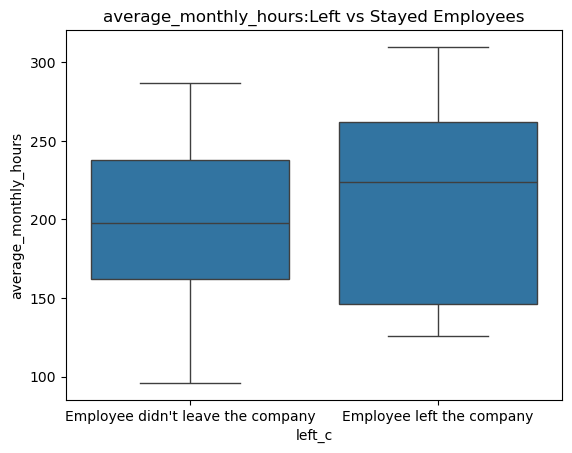

In [9]:
# b
sns.boxplot(x='left_c',y='average_monthly_hours',data=hr_df)
plt.title('average_monthly_hours:Left vs Stayed Employees')

In [10]:
not_left=hr_df[hr_df['left']==0]
not_left

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary,left_c
2000,0.58,0.74,4,215,3,0,0,0,sales,low,Employee didn't leave the company
2001,0.82,0.67,2,202,3,0,0,0,sales,low,Employee didn't leave the company
2002,0.45,0.69,5,193,3,0,0,0,sales,low,Employee didn't leave the company
2003,0.78,0.82,5,247,3,0,0,0,sales,low,Employee didn't leave the company
2004,0.49,0.60,3,214,2,0,0,0,sales,low,Employee didn't leave the company
...,...,...,...,...,...,...,...,...,...,...,...
14206,0.90,0.55,3,259,10,1,0,1,management,high,Employee didn't leave the company
14207,0.74,0.95,5,266,10,0,0,1,management,high,Employee didn't leave the company
14208,0.85,0.54,3,185,10,0,0,1,management,high,Employee didn't leave the company
14209,0.33,0.65,3,172,10,0,0,1,marketing,high,Employee didn't leave the company


Text(0.5, 1.0, 'salary:Left vs Stayed Employees')

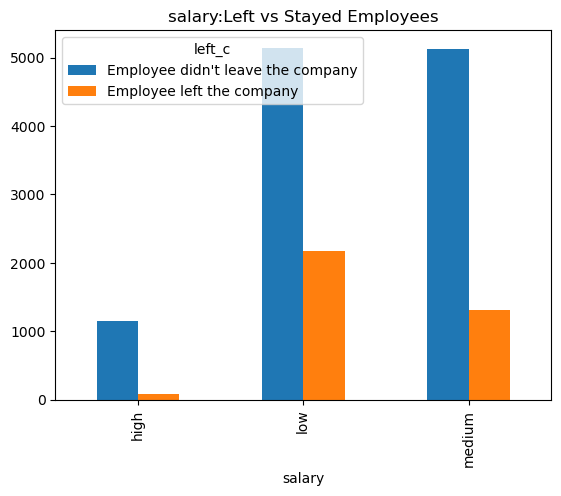

In [27]:
# c
pd.crosstab(hr_df['salary'], hr_df['left_c']).plot(kind='bar')
plt.title('salary:Left vs Stayed Employees')


Text(0.5, 1.0, 'Department:Left vs Stayed Employees')

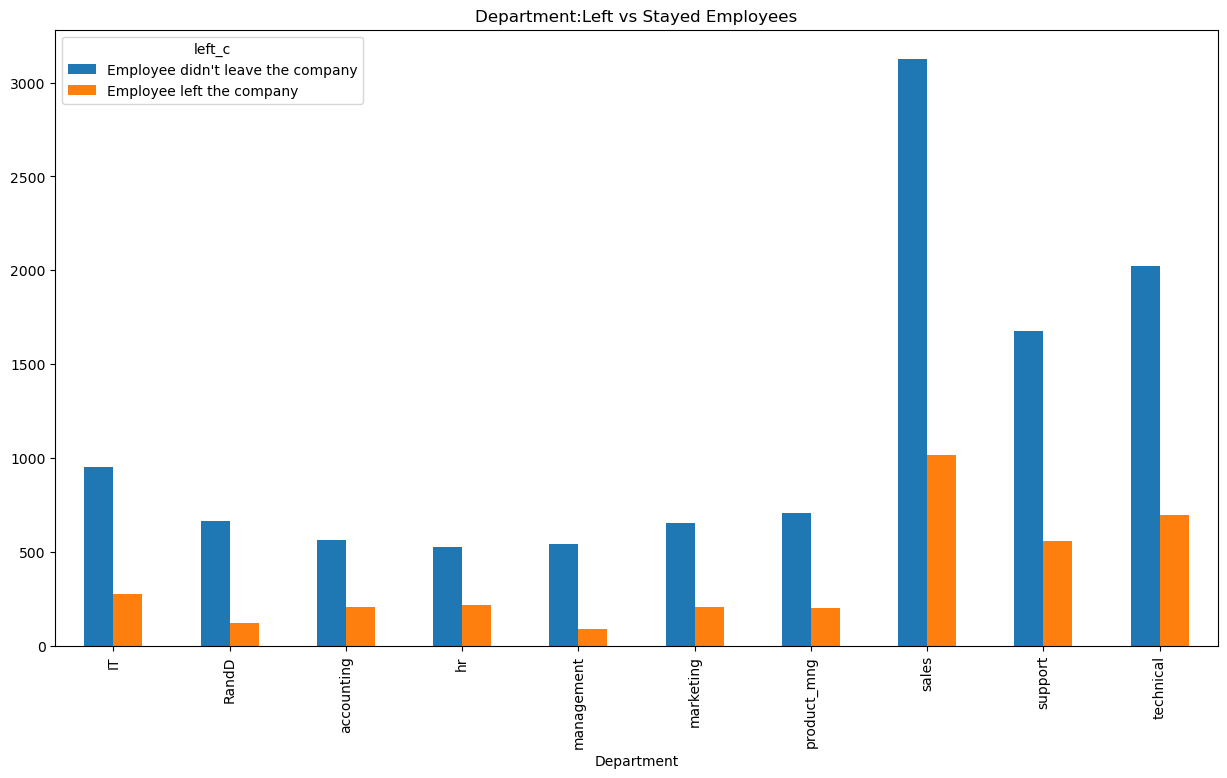

In [12]:
# d
pd.crosstab(hr_df['Department'],hr_df['left_c']).plot(kind='bar',figsize=(15,8))
plt.title('Department:Left vs Stayed Employees')

In [13]:
# task3
# a
hr_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   satisfaction_level     14999 non-null  float64 
 1   last_evaluation        14999 non-null  float64 
 2   number_project         14999 non-null  int64   
 3   average_monthly_hours  14999 non-null  int64   
 4   time_spend_company     14999 non-null  int64   
 5   Work_accident          14999 non-null  int64   
 6   left                   14999 non-null  int64   
 7   promotion_last_5years  14999 non-null  int64   
 8   Department             14999 non-null  object  
 9   salary                 14999 non-null  object  
 10  left_c                 14999 non-null  category
dtypes: category(1), float64(2), int64(6), object(2)
memory usage: 1.2+ MB


In [14]:
label_encoder=LabelEncoder()
hr_df['Department_c']=label_encoder.fit_transform(hr_df['Department'])

In [15]:
hr_df['salary_c']=label_encoder.fit_transform(hr_df['salary'])

In [16]:
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   satisfaction_level     14999 non-null  float64 
 1   last_evaluation        14999 non-null  float64 
 2   number_project         14999 non-null  int64   
 3   average_monthly_hours  14999 non-null  int64   
 4   time_spend_company     14999 non-null  int64   
 5   Work_accident          14999 non-null  int64   
 6   left                   14999 non-null  int64   
 7   promotion_last_5years  14999 non-null  int64   
 8   Department             14999 non-null  object  
 9   salary                 14999 non-null  object  
 10  left_c                 14999 non-null  category
 11  Department_c           14999 non-null  int32   
 12  salary_c               14999 non-null  int32   
dtypes: category(1), float64(2), int32(2), int64(6), object(2)
memory usage: 1.3+ MB


In [17]:
# b
hr_df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
left_c                   0
Department_c             0
salary_c                 0
dtype: int64

In [18]:
# c
hr_df.dtypes

satisfaction_level        float64
last_evaluation           float64
number_project              int64
average_monthly_hours       int64
time_spend_company          int64
Work_accident               int64
left                        int64
promotion_last_5years       int64
Department                 object
salary                     object
left_c                   category
Department_c                int32
salary_c                    int32
dtype: object

In [19]:
col_to_drop=['left_c','Department','salary']
hr_df=hr_df.drop(col_to_drop,axis=1)
hr_df

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department_c,salary_c
0,0.38,0.53,2,157,3,0,1,0,7,1
1,0.80,0.86,5,262,6,0,1,0,7,2
2,0.11,0.88,7,272,4,0,1,0,7,2
3,0.72,0.87,5,223,5,0,1,0,7,1
4,0.37,0.52,2,159,3,0,1,0,7,1
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,8,1
14995,0.37,0.48,2,160,3,0,1,0,8,1
14996,0.37,0.53,2,143,3,0,1,0,8,1
14997,0.11,0.96,6,280,4,0,1,0,8,1


In [20]:
# left column
one_col=hr_df[['left']]

In [21]:
new_df=hr_df.drop(['left'],axis=1)
new_df

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,promotion_last_5years,Department_c,salary_c
0,0.38,0.53,2,157,3,0,0,7,1
1,0.80,0.86,5,262,6,0,0,7,2
2,0.11,0.88,7,272,4,0,0,7,2
3,0.72,0.87,5,223,5,0,0,7,1
4,0.37,0.52,2,159,3,0,0,7,1
...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,0,8,1
14995,0.37,0.48,2,160,3,0,0,8,1
14996,0.37,0.53,2,143,3,0,0,8,1
14997,0.11,0.96,6,280,4,0,0,8,1


<Axes: >

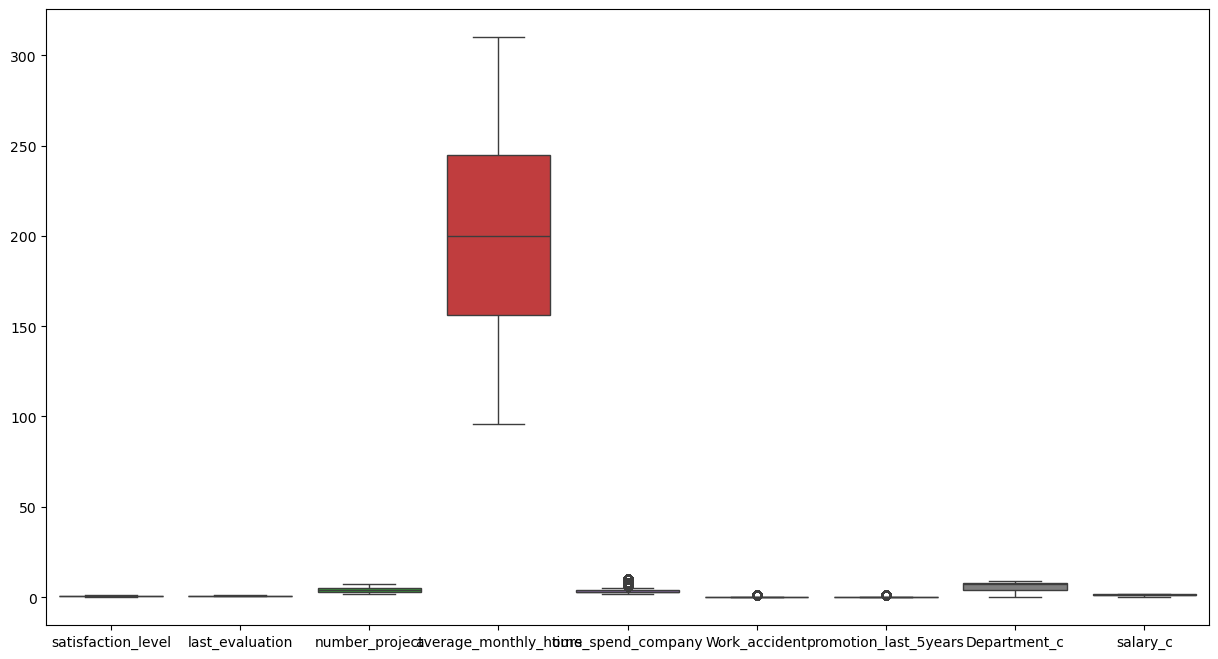

In [22]:
fig,ax=plt.subplots(figsize=(15,8))
sns.boxplot(data=new_df)


In [23]:
def iqr_winsorisation(df,thresh=1.5):
    df_out=df.copy()
    col_to_treat=df_out.columns
    for col in col_to_treat:
        Q1=df_out[col].quantile(0.25)
        Q3=df_out[col].quantile(0.75)
        IQR=Q3-Q1
        uf=Q3+thresh*IQR
        lf=Q1-thresh*IQR
        df_out.loc[df_out[col]>uf,col]=uf
        df_out.loc[df_out[col]<lf,col]=lf
    return df_out

In [24]:
treated_df=iqr_winsorisation(new_df)
treated_df

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,promotion_last_5years,Department_c,salary_c
0,0.38,0.53,2,157.0,3.0,0,0,7,1.0
1,0.80,0.86,5,262.0,5.5,0,0,7,2.0
2,0.11,0.88,7,272.0,4.0,0,0,7,2.0
3,0.72,0.87,5,223.0,5.0,0,0,7,1.0
4,0.37,0.52,2,159.0,3.0,0,0,7,1.0
...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151.0,3.0,0,0,8,1.0
14995,0.37,0.48,2,160.0,3.0,0,0,8,1.0
14996,0.37,0.53,2,143.0,3.0,0,0,8,1.0
14997,0.11,0.96,6,280.0,4.0,0,0,8,1.0


<Axes: >

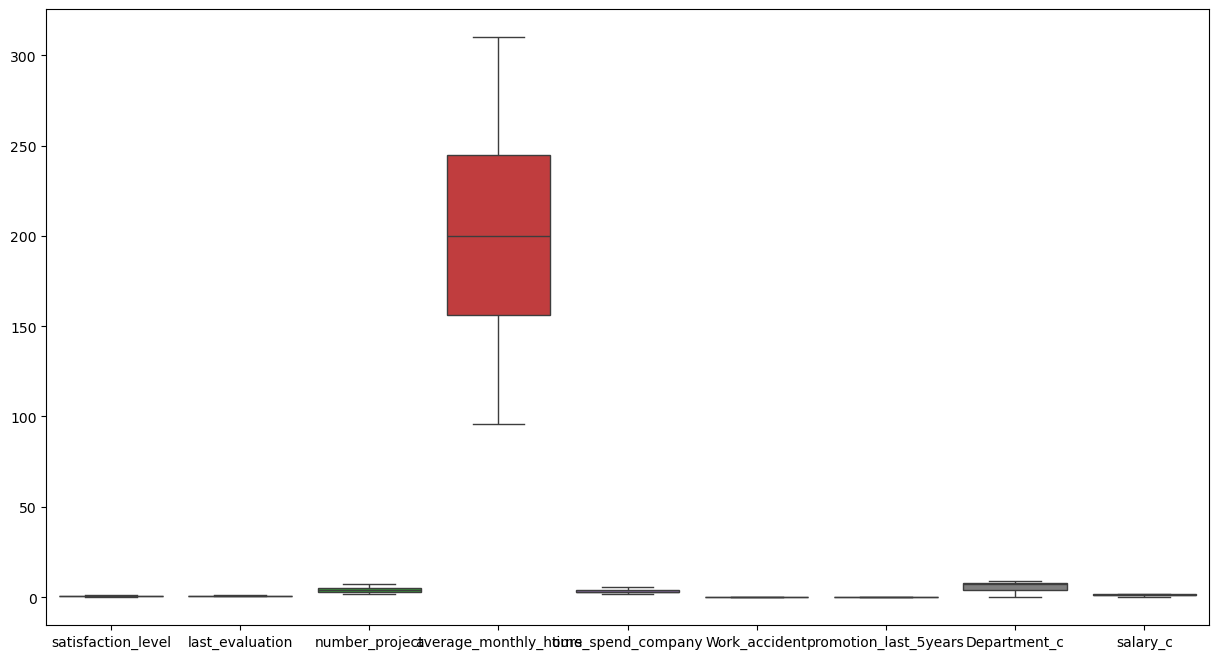

In [25]:
fig,ax=plt.subplots(figsize=(15,8))
sns.boxplot(data=treated_df)

In [26]:
# d
scaler=StandardScaler()
scaled_df=scaler.fit_transform(treated_df)
scaled_df=pd.DataFrame(scaled_df,columns=treated_df.columns)
scaled_df

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,promotion_last_5years,Department_c,salary_c
0,-0.936495,-1.087275,-1.462863,-0.882040,-0.335204,0.0,0.0,0.393725,-0.554955
1,0.752814,0.840707,0.971113,1.220423,1.965181,0.0,0.0,0.393725,1.043004
2,-2.022479,0.957554,2.593763,1.420657,0.584950,0.0,0.0,0.393725,1.043004
3,0.431041,0.899131,0.971113,0.439508,1.505104,0.0,0.0,0.393725,-0.554955
4,-0.976716,-1.145699,-1.462863,-0.841993,-0.335204,0.0,0.0,0.393725,-0.554955
...,...,...,...,...,...,...,...,...,...
14994,-0.856051,-0.853580,-1.462863,-1.002181,-0.335204,0.0,0.0,0.742316,-0.554955
14995,-0.976716,-1.379394,-1.462863,-0.821970,-0.335204,0.0,0.0,0.742316,-0.554955
14996,-0.976716,-1.087275,-1.462863,-1.162368,-0.335204,0.0,0.0,0.742316,-0.554955
14997,-2.022479,1.424944,1.782438,1.580845,0.584950,0.0,0.0,0.742316,-0.554955


In [27]:
scaled_df=pd.concat([scaled_df,one_col],axis=1)
scaled_df

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,promotion_last_5years,Department_c,salary_c,left
0,-0.936495,-1.087275,-1.462863,-0.882040,-0.335204,0.0,0.0,0.393725,-0.554955,1
1,0.752814,0.840707,0.971113,1.220423,1.965181,0.0,0.0,0.393725,1.043004,1
2,-2.022479,0.957554,2.593763,1.420657,0.584950,0.0,0.0,0.393725,1.043004,1
3,0.431041,0.899131,0.971113,0.439508,1.505104,0.0,0.0,0.393725,-0.554955,1
4,-0.976716,-1.145699,-1.462863,-0.841993,-0.335204,0.0,0.0,0.393725,-0.554955,1
...,...,...,...,...,...,...,...,...,...,...
14994,-0.856051,-0.853580,-1.462863,-1.002181,-0.335204,0.0,0.0,0.742316,-0.554955,1
14995,-0.976716,-1.379394,-1.462863,-0.821970,-0.335204,0.0,0.0,0.742316,-0.554955,1
14996,-0.976716,-1.087275,-1.462863,-1.162368,-0.335204,0.0,0.0,0.742316,-0.554955,1
14997,-2.022479,1.424944,1.782438,1.580845,0.584950,0.0,0.0,0.742316,-0.554955,1


<Axes: >

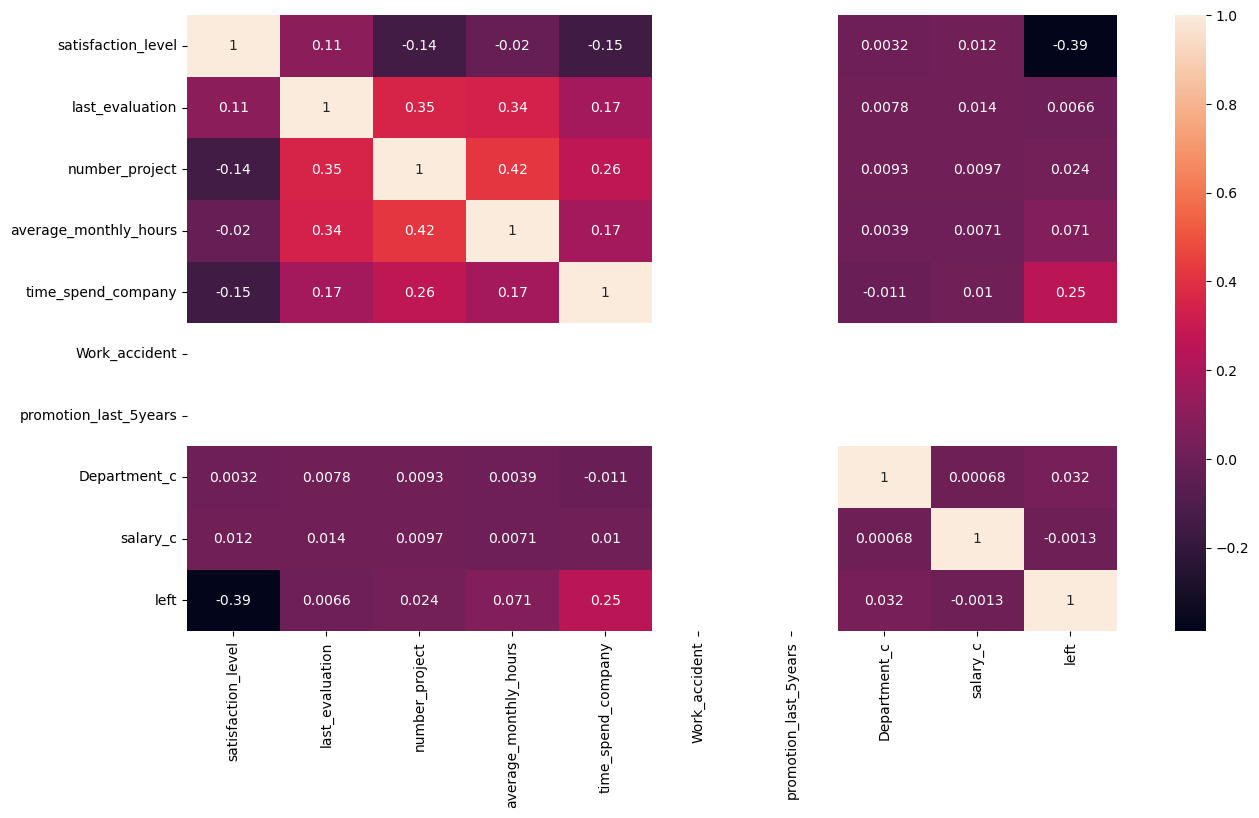

In [28]:
# e
fig,ax=plt.subplots(figsize=(15,8))
sns.heatmap(scaled_df.corr(),annot=True)

In [29]:
hr_train,hr_test=train_test_split(scaled_df,train_size=0.8,random_state=200)
print(hr_train.shape)
print(hr_test.shape)

(11999, 10)
(3000, 10)


In [30]:
scaled_df

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,promotion_last_5years,Department_c,salary_c,left
0,-0.936495,-1.087275,-1.462863,-0.882040,-0.335204,0.0,0.0,0.393725,-0.554955,1
1,0.752814,0.840707,0.971113,1.220423,1.965181,0.0,0.0,0.393725,1.043004,1
2,-2.022479,0.957554,2.593763,1.420657,0.584950,0.0,0.0,0.393725,1.043004,1
3,0.431041,0.899131,0.971113,0.439508,1.505104,0.0,0.0,0.393725,-0.554955,1
4,-0.976716,-1.145699,-1.462863,-0.841993,-0.335204,0.0,0.0,0.393725,-0.554955,1
...,...,...,...,...,...,...,...,...,...,...
14994,-0.856051,-0.853580,-1.462863,-1.002181,-0.335204,0.0,0.0,0.742316,-0.554955,1
14995,-0.976716,-1.379394,-1.462863,-0.821970,-0.335204,0.0,0.0,0.742316,-0.554955,1
14996,-0.976716,-1.087275,-1.462863,-1.162368,-0.335204,0.0,0.0,0.742316,-0.554955,1
14997,-2.022479,1.424944,1.782438,1.580845,0.584950,0.0,0.0,0.742316,-0.554955,1


In [31]:
X_train=hr_train.drop(['left'],axis=1)
y_train=hr_train['left']

print(X_train.shape)
print(y_train.shape)

(11999, 9)
(11999,)


In [32]:
X_test=hr_test.drop(['left'],axis=1)
y_test=hr_test['left']
print(X_test.shape)
print(y_test.shape)

(3000, 9)
(3000,)


In [33]:
from sklearn.linear_model import LogisticRegression

log_reg=LogisticRegression().fit(X_train,y_train)


In [34]:
y_pred=log_reg.predict(X_test)
y_pred

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [35]:
from sklearn.metrics import confusion_matrix

In [36]:
print(confusion_matrix(y_test,y_pred))

[[2077  164]
 [ 558  201]]


In [37]:
TN,FP,FN,TP=confusion_matrix(y_test,y_pred).ravel()
print(TN,FP,FN,TP)


2077 164 558 201


In [38]:
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score


In [39]:
print('recall_score:',recall_score(y_test,y_pred))
print('f1_score:',f1_score(y_test,y_pred))
print('accuracy_score:',accuracy_score(y_test,y_pred))
print('precision_score:',precision_score(y_test,y_pred))


recall_score: 0.2648221343873518
f1_score: 0.35765124555160144
accuracy_score: 0.7593333333333333
precision_score: 0.5506849315068493


In [40]:
from sklearn.metrics import roc_auc_score

roc=roc_auc_score(y_test,log_reg.predict_proba(X_test)[:,1])
roc

0.8361997249722062

In [41]:
from sklearn.metrics import RocCurveDisplay

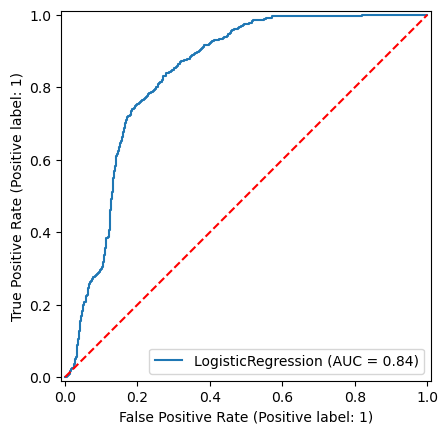

In [42]:
roc=RocCurveDisplay.from_estimator(log_reg,X_test,y_test)
plt.plot([0,1],[0,1],color='red',ls='--')